### 1.  droplet growth in constant updraft

From my Day 26 supersaturation notes eq. 10 we know that if SS is the supersaturation = e/es -1, then:

$r \frac{dr}{dt} = G*SS$

where $G = D \rho_{vs}/\rho_l\ \text{units: }m^2/s$

We also know from Thompkins that for drops with radii smaller than 1 mm the fall speed U is given by::

```
  U  = 1.2e8*r**2.
```

with U in m/s and r in meters.  This means that the rate of change of height is:

$\frac{dh}{dt} = w - U$

Solve these two equations to get an equation for $h(t)$  (note that this also works
for droplets falling through subsaturated air below cloud)



In [2]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from a405thermo.thermlib import find_esat
from a405thermo.constants import constants as c

def find_derivs(y,t,W,Vcoeff,rcoeff):
    yp = np.empty_like(y)
    #first variable is height in m
    yp[0]=W - Vcoeff*y[1]**2.
    #second variable is radius in m
    yp[1]= rcoeff/y[1]
    return yp

def r_analytic(tspan,Gl,SS,r0):
  out=np.sqrt(2.*Gl*SS*tspan + r0**2.)
  return out

def h_analytic(tspan,g,rhol,Gl,S,eta,r0):
  out=w*tspan - 2*g*rhol*(Gl*S*tspan**2. + r0**2*tspan)/(9.*eta)
  return out

w=1 #m/s vertical velocity
temp=283.15 #K
mu0=18.27e-6 #Pa s
T0=291.15 #K

C=120 #K
#from http://en.wikipedia.org/wiki/Viscosity
eta=mu0*(T0 + C)/(temp+C)*(temp/T0)**1.5  #dynamic viscoisty (Pa s)
g=9.8 #m/s^2
rhol=1000. #kg/m^3
Vcoeff=2*g*rhol/(9.*eta)
press= 9.e5  #Pa
#
# Vcoeff should be around 1.2e-8 (ms)^{-1}
#
print('found Vcoeff: ',Vcoeff*1.e-8)
D =  2.36e-5  #m^2/s
esat = find_esat(temp)
rhovs = esat/(temp*c.Rv)
Gl = D*rhovs/c.rhol
#
# Gl should be around 100.e-12 m^2/s
#
print('found Gl =',Gl)
#Gl=100.e-12 #m^2/s
SS=0.005
W=1 #m/s
rcoeff=Gl*SS

found Vcoeff:  1.2186857327091887
found Gl = 2.21629884245e-10


In [3]:
 #start at cloudbase, with a 10 micron drop
r0=1.e-5
var_vec=np.array([0,r0])
tspan =np.arange(0,10000,10)
sol = odeint(find_derivs,var_vec,tspan,args=(W,Vcoeff,rcoeff))
df_ode = pd.DataFrame.from_records(sol,columns = ['height','rdrop'])
hout = h_analytic(tspan,g,rhol,Gl,SS,eta,r0)

[<matplotlib.text.Text at 0x115f0df98>, <matplotlib.text.Text at 0x115f0d160>]

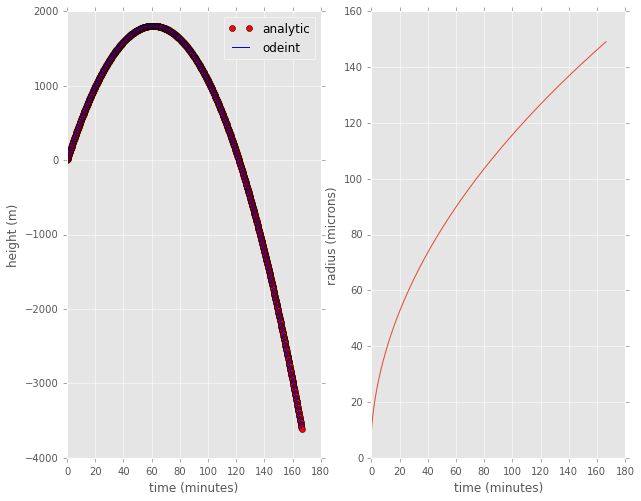

In [4]:
%matplotlib inline
plt.close('all')
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
ax1.plot(tspan/60.,hout,'ro',label='analytic')
ax1.plot(tspan/60,'height','b-',data=df_ode,label='odeint')
ax1.set(ylabel="height (m)",  xlabel="time (minutes)")
ax1.legend(loc='best')
ax2.plot(tspan/60.,df_ode['rdrop']*1.e6)
ax2.set(xlabel='time (minutes)',ylabel='radius (microns)')

### 2.  Drop falling from 1 km

 - If a raindrop has a radius of 1mm at cloud base, which is located 5 km above the ground, what will be its radius at the ground and how long will it take to reach the ground if the relative humidity between cloud base and ground is constant at 60%? [Hint: Use  the day 30 solution and the modified relationship between v and r given in Thompkins: v = 6000r (mks).  If r is in micrometers, the value of $G_l$ in the day 30 problem is 100 for cloud droplets. For the larger drops considered in this problem the value of $G_l$ should be taken as 700 to allow for ventilation effects.



[<matplotlib.text.Text at 0x1163e7550>, <matplotlib.text.Text at 0x1163dee48>]

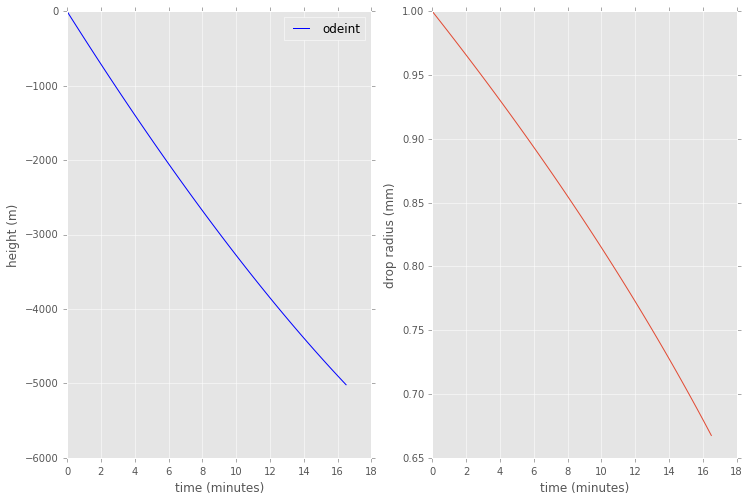

In [5]:
def find_derivs(y,t,W,Vcoeff,rcoeff):
    yp = np.empty_like(y)
    #first variable is height in m
    yp[0]=W - Vcoeff*y[1]
    #second variable is radius in m
    yp[1]= rcoeff/y[1]
    return yp

#start at cloudbase, with a 1 mm drop
r0=0.001
W=0.  #no updraft
Gl = 7.e-10  #includ ventilation
Vcoeff = 6000.
SS = -0.4
rcoeff=Gl*SS
var_vec=np.array([0,r0])
tspan =np.arange(0,1000,10)
sol = odeint(find_derivs,var_vec,tspan,args=(W,Vcoeff,rcoeff))
df_ode = pd.DataFrame.from_records(sol,columns = ['height','rdrop'])
%matplotlib inline
plt.close('all')
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,8))
ax1.plot(tspan/60,'height','b-',data=df_ode,label='odeint')
ax1.set(ylabel="height (m)",  xlabel="time (minutes)")
ax1.legend(loc='best')
ax2.plot(tspan/60,df_ode['rdrop']*1.e3)
ax2.set(xlabel='time (minutes)',ylabel='drop radius (mm)')